<a href="https://colab.research.google.com/github/OAAK125/AI-ML-Club-Project-One/blob/main/Student_DataWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'student-performance-multiple-linear-regression:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3462333%2F6051848%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240911%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240911T202421Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D00e7a23a1bb7d4e98c2dbf1127e9b3826b580b07d64122d1cd937b3a23018701cb8ebd4690a40207000d29866214c022bec8b93193eac5b156fbad362c42fc12486c855cbaa260e1d4af3c753bd6d76f284f88e70c8613793f97992357c6cd84c6dda8bb7ac47eb2a5b1a724cc8ba0e219611544abe798f9ec94fab4054e152dd342527e805bc743312c9b15c4c970d00ede77883f3c77cdcf0bea75c8f7b88ee1c2627dea68345b902858e7b2f30e157c5045fc0f9f0bb3cc68d338e58e0489c63a6f7a08de8da9d0d67f3919686a090b883e0ebe42162cbf656029e6bec9ec0f147c231a4fe917cb4362c9012a2ca1895a0a820e515f5400517da55807be48'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv


# **Read and load data**

In [ ]:
df = pd.read_csv("/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


# **Describe the Data**

In [ ]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


# **Check for missing values**

In [ ]:
missing_values_count = df.isnull().sum()
missing_values_count[0:10]

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

**Therefore, there are no missing values**

# **Data Visualization**

Text(0.5, 1.0, 'Hours Studied vs. Performance Index')

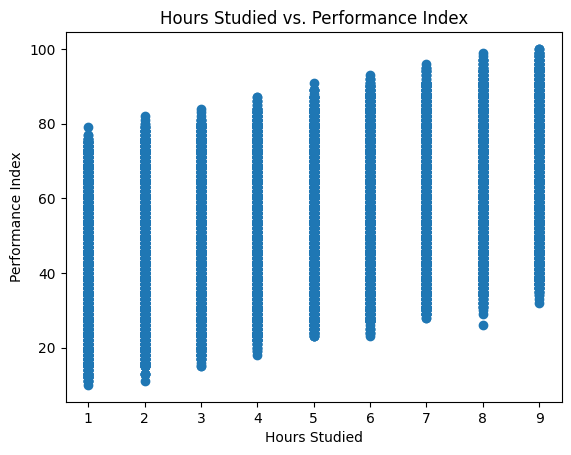

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Hours Studied'], df['Performance Index'])
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Hours Studied vs. Performance Index')

**Inference:** As a student studies for more hours, they are more likely to perform better next time.

# **Data Preparation**

## **Convert categorical data to integer**

In [ ]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,NaN,9,1,91.0
1,4,82,NaN,4,2,65.0
2,8,51,NaN,7,2,45.0
3,5,52,NaN,5,2,36.0
4,7,75,NaN,8,5,66.0


## **Define y: The Target Variable**

In [ ]:
y = df['Performance Index']
y

## **Define x: The Input features**

In [ ]:
x = df.drop('Performance Index',axis = 1)
#axis = 1 drops y in the column but axis = 0 drops in row

x

## **Data Splitting**

In [ ]:
#spit to train/test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
x_train

In [ ]:
x_test

# **Model Building**

## **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

## **Training the model**

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

## **Applying the model to make a prediction**

In [ ]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [ ]:
y_lr_train_pred

In [ ]:
y_lr_test_pred

## **Evaluate model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mean = mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2 = r2_score(y_train,y_lr_train_pred)

lr_test_mean = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print('LR Mean(Train):' , lr_train_mean)
print('LR R2(Train):' , lr_train_r2)
print('LR Mean(Test):' , lr_test_mean)
print('LR R2(Test):' , lr_test_r2)

## **Data Visualization of prediction results**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x = y_train, y = y_lr_train_pred, alpha = 0.3)

coef = np.polyfit(y_train, y_lr_train_pred, 1)
poly1d_fn = np.poly1d(coef)

plt.plot(y_train, poly1d_fn(y_train), color='red', linewidth=2)

plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')
plt.show()

**The scatter diagram above shows the following:**
1. As actual values are increasing, predicted values are also increasing.
2. There is a good correlation between predicted and actual values.
3. The pedictive accuracy of the model is very good.
